# Sonic elements
Sonic elements are bits of sound generated from the recorded utterances and inserted into the primary composition loop. Incoming utterances are passed along to one of the following transformations:
 - *Low attention*: unmusified speech
 - *High attention*: musified speech, which can one of these:
  - Rhythm
  - Melody
  - Groove
  
A transformation is either looped or one-shot. *Rhythm* and *Groove* are looped; *Melody* and *Speech* are one-shot. The primary composition loop is 16 bars, which is a lot of space to fill, so looped elements are replicated up to 4 times within that loop. The number of repetitions in a composition loop is randomly determined when the loop is initialized. One-shot elements are played a grand total of one time.

### Rhythm
Take a rhythm of an utterance and play it using sounds that come from granular synthesis of the utterance. You can see more detail in the [rhythm](rhythm.ipynb) notebook

### Melody
Pitch and amplitude track the utterance and apply it to a synthesizer. Pitch is quantified, but the amplitude is continuous. Melody parts are time stretched 2x, 4x, or 8x. Each user gets their own synth sound: 1) Super saw, 2) Octave sine, 3) Feedback sine, 4) Square.

### Groove
Uses the same user-specific synths as melody, but instead of a amplitude that tracks that of the speech, extract note triggers from speech onsets and use them to trigger notes of fixed ADSR.

# Composition of the parts

Elements are scheduled in to a **master loop** as they are generated. The master loop is sixteen 4/4 bars. The tempo starts out at 120 bpm, which makes the loop 32 seconds. At the top of each loop, the tempo is updated based on the tempo of incoming speech.

A fixed number of parts of each type will be playing at any given moment. This constraint serves two purposes: 1) to limit the amount of memory the program will need, 2) to set the density of musical elements (we can't have unlimited parts playing at once).
 - Unmusified speech: 8
 - Rhythm: 8
 - Melody: 8
 - Groove: 4

# Mind control
We take three different brain states from the host: *attention*, *relaxation*, *mindfulness*.
### Attention
This is just the Muse estimate for attention. It has the following effects:
 - We are attemtping to evaluate the effect each utterance has on the host's attention. We wait 1.5 seconds after arrival of the utterance and look to see if in that time attention increased or decreased. A decrease in attention routes the utterance to become *unmusified speech*. An increase in attention routes the utterance to become one of the three *musified* elements.
 
At the top of each master loop (roughly once every 32 seconds), the values of the other brain states are aggregated and adjust other musical parameters.

### Relaxation
This is just the Muse estimate for relaxation. This sets the delay feedback for the rhythm parts.

### Mindfulness
This is an average of *attention* and *relaxation* and sets the volume of the musified speech parts relative to the unmusified speech parts. Higher *mindfulness* means louder musified speech and quieter unmusified speech.

The attention and relaxation brain state measurements combined set the ADSR for the *Groove* parts. Below is a diagram indicating how the ADSR shapes are determined. High attention, low relaxation gives long notes with short attacks and releases. High attention relaxation gives short notes with short attacks and releases. Low attention, high relaxation gives long notes with slow attacks and releases.

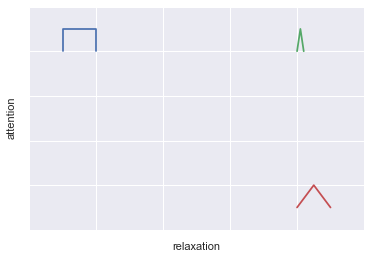

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

shp1 = np.array([[0,0,1,1], [0,1,1,0]])
shp2 = np.array([[0,0.1,0.2], [0,1,0]])
shp3 = np.array([[0,0.5,1], [0,1,0]])

fig, ax = plt.subplots();
ax.plot(shp1[0]+1, shp1[1]+8);
ax.plot(shp2[0]+8, shp2[1]+8);
ax.plot(shp3[0]+8, shp3[1]+1);
ax.set_xlim([0,10]);
ax.set_ylim([0,10]);
ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_xlabel('relaxation');
ax.set_ylabel('attention');